In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15544\3518226642.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
df_rating_1 = pd.read_csv("datasets/ratings/1.csv")
df_rating_2 = pd.read_csv("datasets/ratings/2.csv")
df_rating_3 = pd.read_csv("datasets/ratings/3.csv")
df_rating_4 = pd.read_csv("datasets/ratings/4.csv")
df_rating_5 = pd.read_csv("datasets/ratings/5.csv")
df_rating_6 = pd.read_csv("datasets/ratings/6.csv")
df_rating_7 = pd.read_csv("datasets/ratings/7.csv")
df_rating_8 = pd.read_csv("datasets/ratings/8.csv")
df_rating_total = pd.concat([df_rating_1, df_rating_2, df_rating_3,df_rating_4,df_rating_5,df_rating_6,df_rating_7,df_rating_8])

verificamos variables y su tipo

In [4]:
df_rating_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11024289 entries, 0 to 1499999
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  int64  
 3   movieId    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 420.5+ MB


In [5]:
df_rating_total.describe()

,userId,rating,timestamp
count,1.102429e+07,1.102429e+07,1.102429e+07
mean,8.997251e+04,3.533455e+00,1.172542e+09
std,8.686601e+04,1.059692e+00,2.056774e+08
min,1.000000e+00,5.000000e-01,7.896520e+08
25%,2.855800e+04,3.000000e+00,9.901593e+08
50%,5.684300e+04,3.500000e+00,1.153610e+09
75%,1.168670e+05,4.000000e+00,1.360470e+09
max,2.708960e+05,5.000000e+00,1.501827e+09


In [13]:
df_rating_total.head(3)

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381


verificamos duplicados

In [6]:
df_rating_total.value_counts(df_rating_total.duplicated())

False    11024165
True          124
dtype: int64

Se eliminan duplicados mateninendo la primer aparicion

In [7]:
df_rating_total = df_rating_total.drop_duplicates( keep='first')

In [8]:
df_rating_total.value_counts(df_rating_total.duplicated())

False    11024165
dtype: int64

Verificamos la distribucion de los score

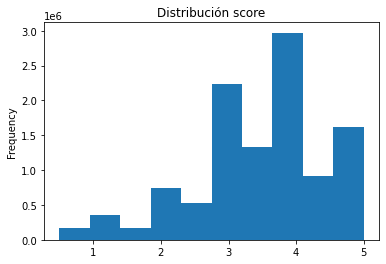

In [9]:
df_rating_total['rating'].plot.hist()
plt.title('Distribución score')
plt.show()

VERIFICAMOS OUTLIERS, dispersion y valores atipicos

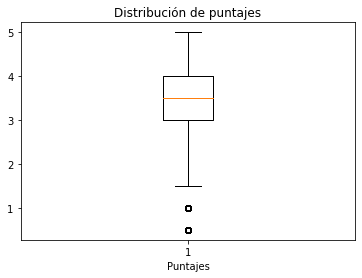

In [14]:
plt.boxplot(df_rating_total['rating'])
plt.title("Distribución de puntajes")
plt.xlabel("Puntajes")
plt.show()

Verificamos correlacion de variables, para analizar si existe relación lineal entre dos o más variables en un conjunto de datos

In [11]:
corr = df_rating_total.corr ()

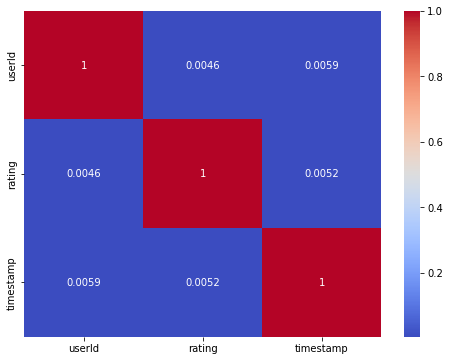

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()